### Problem Statement

The CarDekho company maintains a database of the cars sold through their platform. The data represents the cars sold by 
Car Dekho and the car related features. We have to build a linear regression model to predict the Selling price of the car. 
Calculate all the error metrics and diagnostic plots to check the regression result. The dataset contains data for around 
301 cars sold by CarDekho.


### Data Description

Car_Name: Name of the cars.
Year: Year of the car when it was bought.
Selling_Price: Price at which the car is being sold.
Present_Price: Current ex-showroom price of the car.
Kms_Driven: Distance completed by the car in km.
Fuel_Type: Fuel type of the car.
Seller_Type: Tells if a Seller is Individual or a Dealer.
Transmission: Gear transmission of the car (Automatic/Manual).
Owner: Number of previous owners of the car.

### Tasks/Activities List:
Your code should contain the following activities/Analysis:
Read the cars dataset.
Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.
Transform the categorical data.
Apply the Multiple Linear Regression model
Print the model results
Get the feature importance
Visualize the diagnostic plots

### Success Metrics:
Below are the metrics for the successful submission of this case study.
The R-squared of the trained model > 0.8
The Adjusted R-squared of the trained model > 0.8
Click here for the dataset

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

C:\Users\nikde\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### 2. Data Preparation

In [2]:
dataset = pd.read_csv("car data.csv")

In [3]:
dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


### 2.1 Understanding the data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
len(dataset)

301

In [7]:
len(dataset.columns)

9

### 2.2 Exploratory Data Analysis

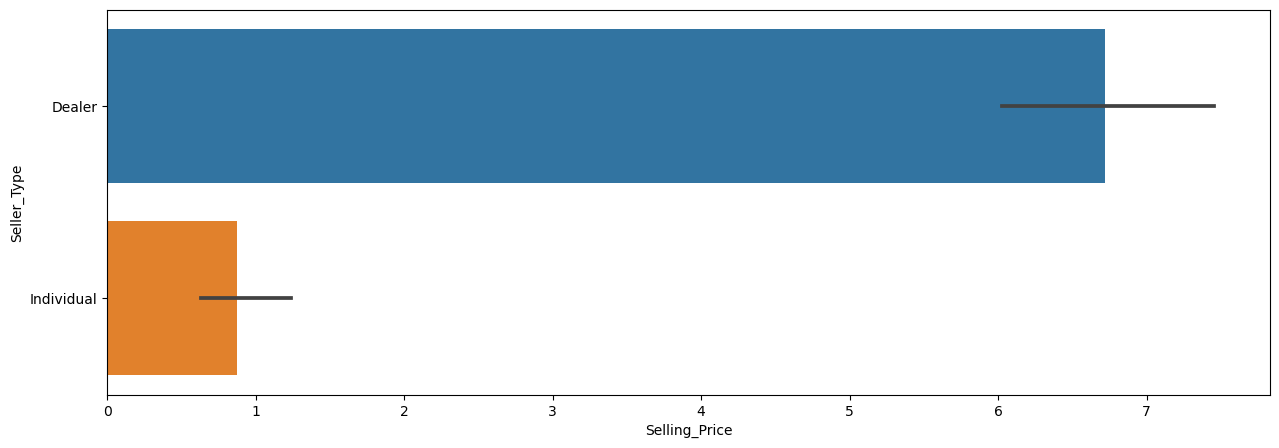

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Seller_Type',x='Selling_Price')
plt.show()

#### New Cars purchased from dealers are more expensive than the ones through individuals 

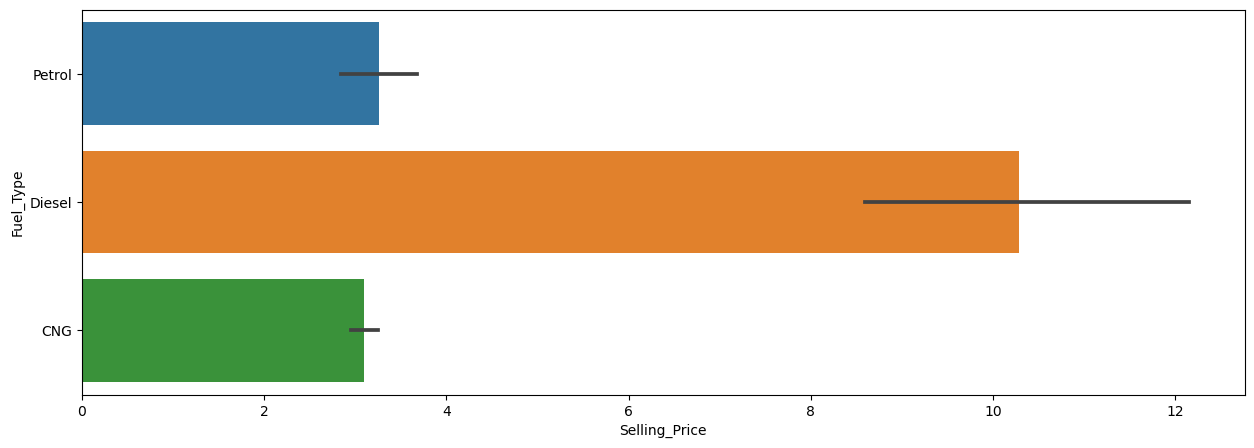

In [9]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Fuel_Type',x='Selling_Price')
plt.show()

#### Diesel cars are more expensive than Petrol & CNG Cars

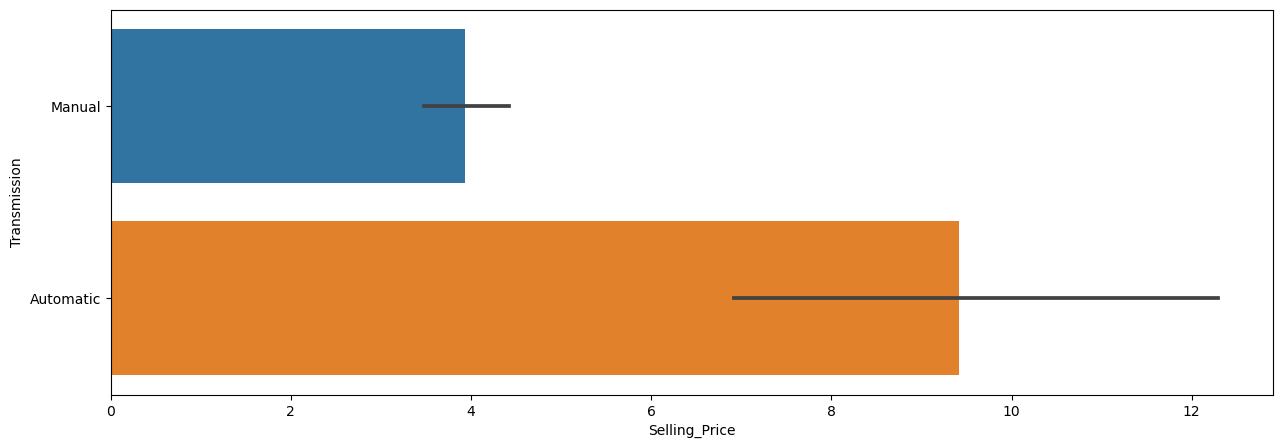

In [10]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, y = 'Transmission',x='Selling_Price')
plt.show()

#### Automatic Cars have a higher selling price

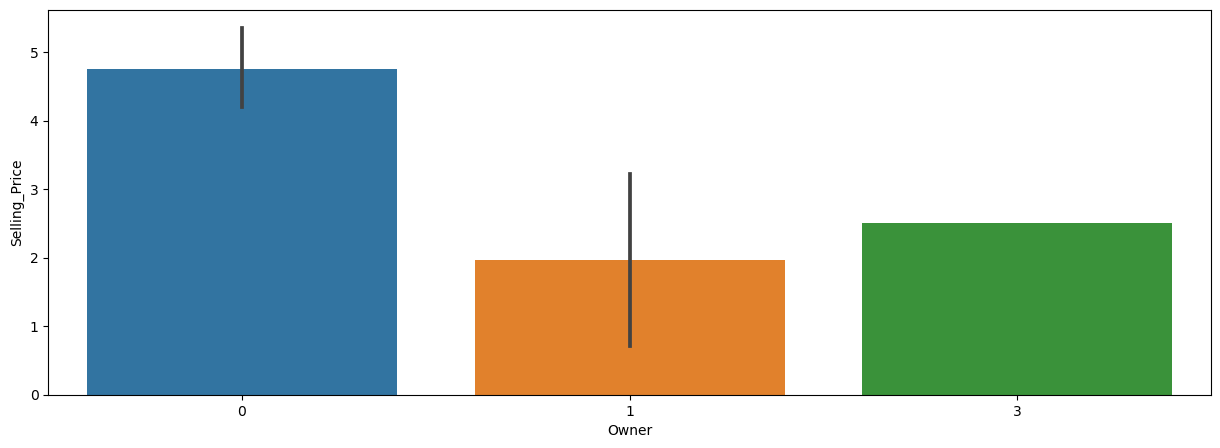

In [11]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'Owner', y='Selling_Price')
plt.show()

#### Cars which have never been owned have a higher selling price

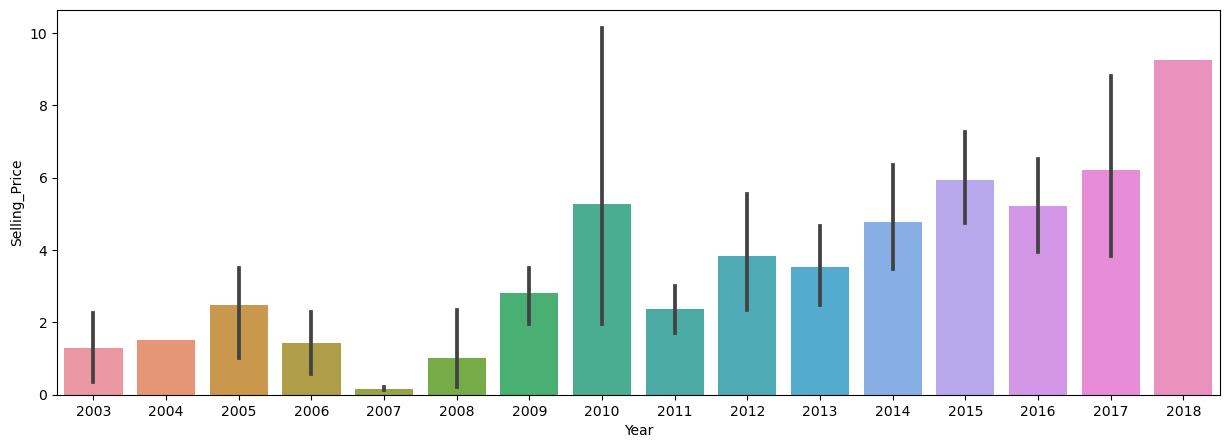

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(data=dataset, x = 'Year',y='Selling_Price')
plt.show()

#### Newer the car is, higher the selling price it will have

<Figure size 1500x500 with 0 Axes>

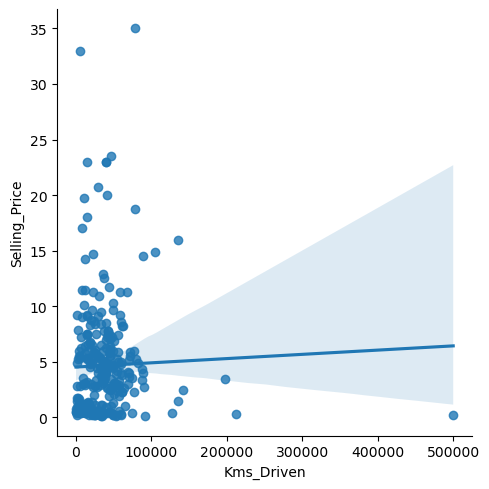

In [13]:
plt.figure(figsize=(15,5))
sns.lmplot(data=dataset, x = 'Kms_Driven',y='Selling_Price')
plt.show()

#### If the Kilometer driven are lesser more the price is

### 2.3 Outlier Treatment

In [14]:
#Outlier Treatment
def outlier_treatment(dataframe):
    
    numeric_df = dataframe.select_dtypes(include=['number'])
    
    
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    condition = ~((numeric_df < lower_bound)| (numeric_df > upper_bound)).any(axis=1)
    
    df_rem_out = dataframe[condition]
    
    return df_rem_out



In [15]:
dataset = outlier_treatment(dataset)

In [16]:
len(dataset)

264

### 2.4. Missing Value Treatment

In [17]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

#### In this dataset there are no missing values so we are good to proceed to the next steps.

### 2.5. Encoding

In [18]:
# Separating the numerical and categorical columns
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

In [19]:
numerical

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [20]:
categorical

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [21]:
# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

In [22]:
binary_cols

['Owner']

In [23]:
# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

In [24]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0


### 2.6. Splitting the data into Train and Test

In [25]:
x = dataset.iloc[:,[1,3,4,5,6,7,8]].values

In [26]:
x

array([[2.0140e+03, 5.5900e+00, 2.7000e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0130e+03, 9.5400e+00, 4.3000e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0170e+03, 9.8500e+00, 6.9000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [2.0090e+03, 1.1000e+01, 8.7934e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0170e+03, 1.2500e+01, 9.0000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.0160e+03, 5.9000e+00, 5.4640e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [27]:
y=dataset.iloc[:,2].values

In [28]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  3.  ,  5.85,  2.55,  1.95,  5.5 ,  1.25,  7.5 ,  2.65,
        1.05,  5.8 ,  7.75,  3.6 ,  4.5 ,  4.75,  6.95,  4.5 ,  4.75,
        9.25,  4.35,  3.95,  4.5 ,  7.45,  2.65,  4.9 ,  3.95,  5.5 ,
        5.25,  4.75, 12.5 ,  5.9 ,  3.45,  4.75,  3.8 , 11.25,  4.  ,
        5.85,  7.05,  9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,
        1.25,  1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,
        1.1 ,  1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,
        0.9 ,  0.9 ,  0.75,  0.8 ,  0.78,  0.75,  0.75,  0.75,  0.72,
        0.65,  0.65,  0.65,  0.65,  0.6 ,  0.6 ,  0.6 ,  0.6 ,  0.6 ,
        0.6 ,  0.6 ,  0.6 ,  0.55,  0.55,  0.52,  0.51,  0.5 ,  0.5 ,
        0.5 ,  0.5 ,

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [30]:
len(x_train), len(y_train)

(184, 184)

In [31]:
len(x_test), len(y_test)

(80, 80)

### Applying the Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

# Fitting the model
regressor_ini = LinearRegression()
regressor_ini.fit(x_train, y_train)

# Returning the R^2 for the model
regressor_ini_R2 = regressor_ini.score(x_train, y_train)
print('R^2: {0}'.format(regressor_ini_R2))

R^2: 0.8381048705857526


In [33]:
# Function to calculate the residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [34]:
# Assessing the Linear Assumption of the model
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


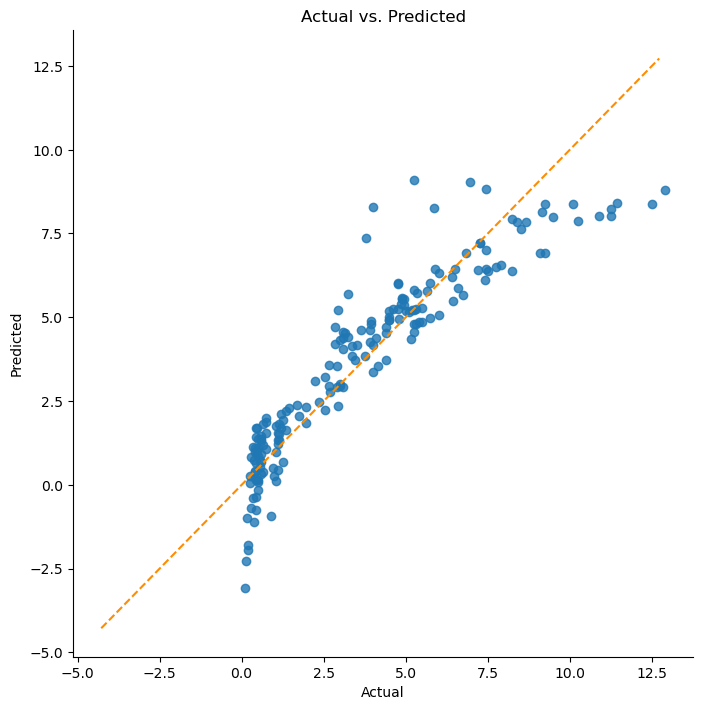

In [35]:
linear_assumption(regressor_ini, x_train, y_train)

In [36]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 1.6906808890942588e-09
Residuals are not normally distributed


C:\Users\nikde\AppData\Local\Temp\ipykernel_14852\965784447.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])
C:\Users\nikde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


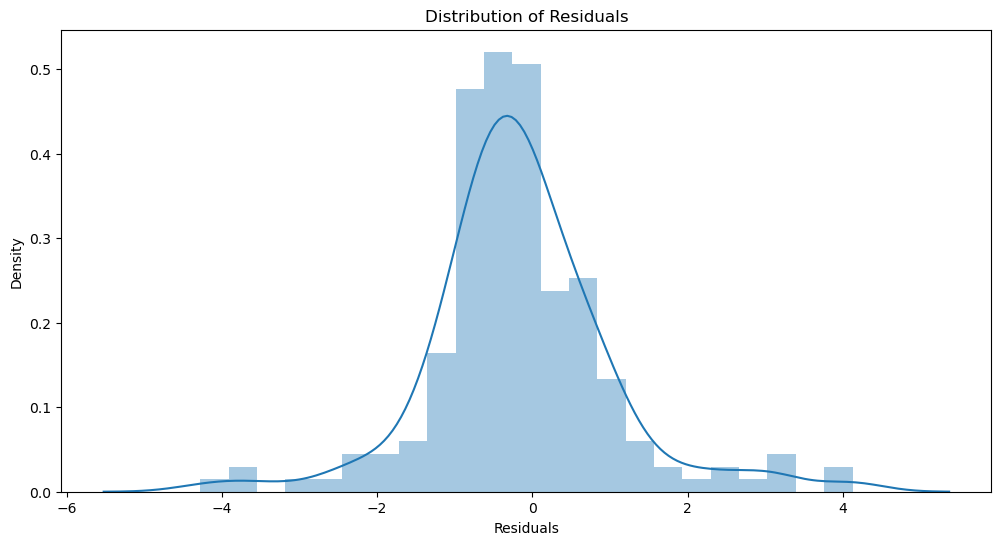


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [37]:
normal_errors_assumption(regressor_ini, x_train, y_train)

In [38]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


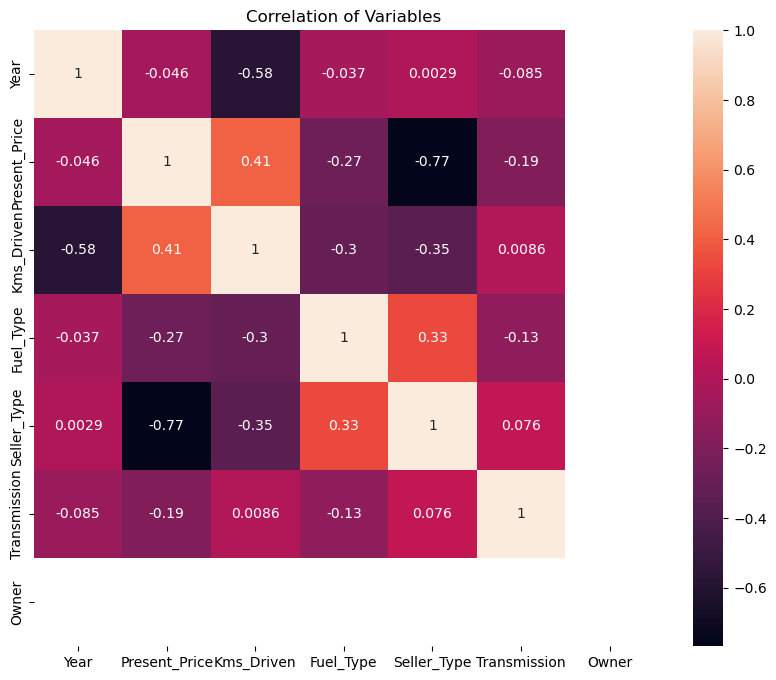

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Year: 56.71036381892112
Present_Price: 6.770010730724577
Kms_Driven: 4.27277288896636
Fuel_Type: 25.46403146369479
Seller_Type: 4.039341254408377
Transmission: 12.49155899595746
Owner: nan

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


C:\Users\nikde\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [39]:
multicollinearity_assumption(regressor_ini, x_train, y_train, dataset.iloc[:,[1,3,4,5,6,7,8]].columns.values)

In [40]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [41]:
autocorrelation_assumption(regressor_ini, x_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8539546340582012
Little to no autocorrelation 

Assumption satisfied


In [42]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


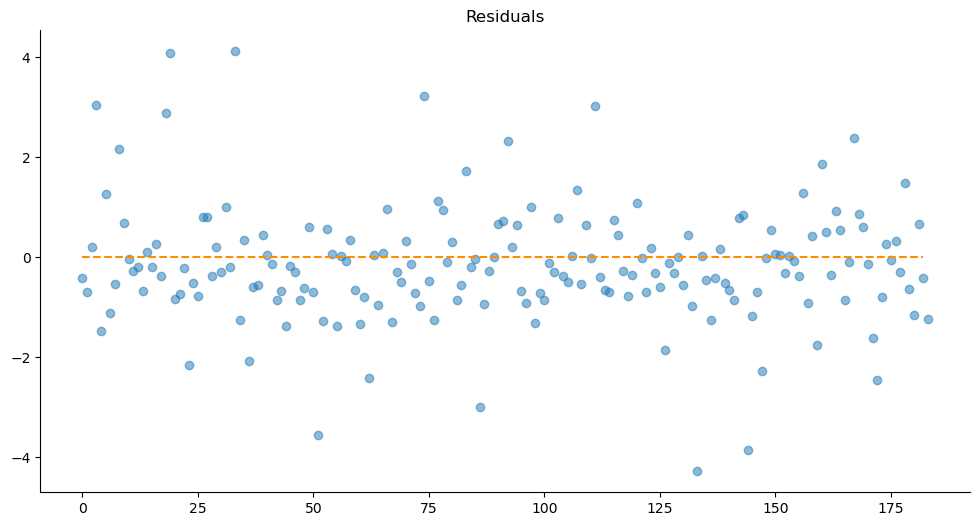

In [43]:
homoscedasticity_assumption(regressor_ini, x_train, y_train)

#### 7. Building the MLR Model

In [44]:
#Adding the constant 1 to get the Y-Intercept value
x_train = np.append(arr=x_train, values = np.ones((184,1)).astype(int), axis=1)

In [45]:
#Adding the constant 1 to get the Y-Intercept value
x_test = np.append(arr=x_test, values = np.ones((80,1)).astype(int), axis=1)

In [46]:
import statsmodels.api as sm

In [47]:
regressor_ini = sm.OLS(endog=y_train, exog=x_train).fit()

In [48]:
regressor_ini.summary()

C:\Users\nikde\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     152.7
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           2.97e-67
Time:                        14:34:56   Log-Likelihood:                -297.22
No. Observations:                 184   AIC:                             608.4
Df Residuals:                     177   BIC:                             630.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3452      0.052      6.696      0.000       0.243       0.447
x2             0.4148      0.031     13.179      0.000       0.353       0.477
x3          -1.35e-05   6.41e-06     -2.107      0.036   -2.61e-05   -8.58e-07
x4            -0.7658      0.255     -3.008      0.003      -1.268      -0.263
x5            -1.5844      0.303     -5.225      0.000      -2.183      -0.986
x6             0.0954      0.340      0.281      0.779      -0.576       0.767
const               0          0        nan        nan           0           0
x7          -691.6190    104.093     -6.644      0.000    -897.042    -486.196
==============================================================================
Omnibus:                       17.887   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.298
Skew:                           0.359   Prob(JB):                     2.40e-10
Kurtosis:                       5.294   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
y_pred_ini = regressor_ini.predict(x_test)

In [50]:
y_pred_ini

array([ 1.03236088e-01, -9.85586055e-01,  2.79452665e-01,  7.29682963e+00,
        6.55546392e+00,  1.41149497e+00,  3.02434170e+00,  4.90570620e+00,
        9.06226325e+00, -9.44691050e-01, -1.33884463e+00,  1.66170819e+00,
        7.06742239e+00,  4.46129531e+00,  3.99822925e+00,  1.92945829e+00,
        4.14111983e+00,  7.54869719e+00,  4.57214056e+00,  5.90949227e+00,
        1.96890509e+00,  1.75641312e+00,  7.29029832e+00,  7.93381271e-01,
        9.26838899e+00,  1.79120573e-01,  6.49665823e+00,  2.33287217e+00,
        7.88973601e+00,  6.89355602e+00,  5.39134029e+00,  2.02504150e+00,
        3.68007173e+00,  5.85548669e+00,  3.00919236e+00,  1.70763126e+00,
        4.12186558e+00,  4.64848422e+00,  5.95558404e+00,  4.76652365e-01,
        3.02116626e+00,  4.55085365e+00,  7.72474898e+00,  1.51796191e+00,
        1.94572495e-03,  5.94569334e+00,  8.85546619e+00,  6.48284236e+00,
        5.38958511e+00,  1.12805057e+00,  1.96065957e+00,  6.93406640e-01,
        1.74710845e+00,  

#### 7.2 MLR Model after Removing Insignificant Variables


As the P value is more that 0.05 we will remove the feature X6, P values helps us to understand 
if the variable is significant or not

The test hypothesis for P value for variables is given as:

Ho: All β's are equal to zero (i.e. regression model is not significant)

H1: At least one β is not equal to zero (i.e. regression model is significant)

If the P-value is coming out more than 0.05 we reject the variable as it is insignificant, 
however if the varibles are having P-value less than 0.05 than the variable is considered as the significant variable


In [51]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,81,2014,3.35,5.59,27000,2,0,1,0
1,84,2013,4.75,9.54,43000,1,0,1,0
2,61,2017,7.25,9.85,6900,2,0,1,0
3,87,2011,2.85,4.15,5200,2,0,1,0
4,83,2014,4.60,6.87,42450,1,0,1,0


In [52]:
x = dataset.iloc[:,[1,3,4,5,6,8]].values

In [53]:
x

array([[2.0140e+03, 5.5900e+00, 2.7000e+04, 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0130e+03, 9.5400e+00, 4.3000e+04, 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 9.8500e+00, 6.9000e+03, 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.0090e+03, 1.1000e+01, 8.7934e+04, 2.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0170e+03, 1.2500e+01, 9.0000e+03, 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0160e+03, 5.9000e+00, 5.4640e+03, 2.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [54]:
y = dataset.iloc[:,2:3].values

In [55]:
y

array([[ 3.35],
       [ 4.75],
       [ 7.25],
       [ 2.85],
       [ 4.6 ],
       [ 9.25],
       [ 6.75],
       [ 6.5 ],
       [ 8.75],
       [ 7.45],
       [ 2.85],
       [ 6.85],
       [ 7.5 ],
       [ 6.1 ],
       [ 2.25],
       [ 7.75],
       [ 7.25],
       [ 7.75],
       [ 3.25],
       [ 2.65],
       [ 2.85],
       [ 4.9 ],
       [ 4.4 ],
       [ 2.5 ],
       [ 2.9 ],
       [ 3.  ],
       [ 4.15],
       [ 6.  ],
       [ 1.95],
       [ 7.45],
       [ 3.1 ],
       [ 2.35],
       [ 4.95],
       [ 6.  ],
       [ 5.5 ],
       [ 2.95],
       [ 4.65],
       [ 3.  ],
       [ 5.85],
       [ 2.55],
       [ 1.95],
       [ 5.5 ],
       [ 1.25],
       [ 7.5 ],
       [ 2.65],
       [ 1.05],
       [ 5.8 ],
       [ 7.75],
       [ 3.6 ],
       [ 4.5 ],
       [ 4.75],
       [ 6.95],
       [ 4.5 ],
       [ 4.75],
       [ 9.25],
       [ 4.35],
       [ 3.95],
       [ 4.5 ],
       [ 7.45],
       [ 2.65],
       [ 4.9 ],
       [ 3.95],
       [

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [57]:
regressor_tuned = sm.OLS(endog=y_train, exog=x_train).fit()

In [58]:
y_pred_tuned = regressor_tuned.predict(x_test)

In [59]:
y_pred_tuned

array([-0.14255261,  4.71128934,  4.46749197,  1.72262247,  0.70355618,
        8.41939652,  7.92094541,  1.07300858,  0.59666623,  2.43065685,
        5.32532171,  4.4843316 ,  5.3213903 ,  9.04807116,  5.37522607,
        1.44416365,  5.8870985 ,  0.08143349,  6.48224472,  7.51486589,
        1.23536219,  1.50028914,  4.03065066,  4.2056191 ,  6.24797854,
        4.49797556,  1.85953033,  4.59074854,  5.80773595,  8.8779068 ,
        5.18157067,  3.96239441,  2.74589561,  0.8135225 ,  6.50854458,
        4.37523458,  0.80785346,  2.1003756 ,  6.5341322 ,  4.98699664,
        4.31713558,  3.90481901,  8.51699477,  6.82278079,  1.10311496,
        1.10859702,  8.36465724,  0.64748174,  1.86009003,  3.44409496,
        2.83099499,  0.49057523,  5.20792514,  1.23024662,  3.62347001,
        1.54996915,  7.54696682,  7.42037515,  7.25727936,  4.27143859,
        4.4116271 ,  1.33266917,  8.16850323,  7.19712866,  0.7492873 ,
        4.42545569,  5.45383814,  0.91408278,  0.47645509,  6.45

In [60]:
regressor_tuned.summary()

C:\Users\nikde\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1934: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              496.9
Date:                Tue, 11 Jun 2024   Prob (F-statistic):                   6.58e-103
Time:                        14:34:57   Log-Likelihood:                         -302.17
No. Observations:                 184   AIC:                                      614.3
Df Residuals:                     179   BIC:                                      630.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0029      0.000     10.004      0.000       0.002       0.004
x2             0.3938      0.031     12.537      0.000       0.332       0.456
x3         -3.931e-05   5.15e-06     -7.635      0.000   -4.95e-05   -2.92e-05
x4            -1.4260      0.250     -5.707      0.000      -1.919      -0.933
x5            -1.8554      0.303     -6.128      0.000      -2.453      -1.258
const               0          0        nan        nan           0           0
==============================================================================
Omnibus:                       12.580   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.182
Skew:                           0.055   Prob(JB):                     6.23e-08
Kurtosis:                       5.078   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

So, we have performed feature importance and have got the significant features.

#### Plotting Diagnostic Plots

In [61]:
from statsmodels.graphics.gofplots import qqplot

In [62]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (184, 6), y_train shape: (184, 1)
x_test shape: (80, 6), y_test shape: (80, 1)


In [63]:
# Flatten y_train and y_test to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

In [64]:
if x_train.shape[1] == 6:
    x_train = np.append(arr=x_train, values=np.ones((x_train.shape[0], 1)).astype(int), axis=1)
if x_test.shape[1] == 6:
    x_test = np.append(arr=x_test, values=np.ones((x_test.shape[0], 1)).astype(int), axis=1)


In [65]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (184, 7), y_train shape: (184,)
x_test shape: (80, 7), y_test shape: (80,)


In [66]:
# Fitting the model
model = sm.OLS(y_train, x_train).fit()

In [67]:
# Predictions
y_pred = model.predict(x_test)

In [84]:
y_pred

array([ 0.36990874,  5.00018981,  3.543789  ,  1.04145515,  0.33000322,
        8.79992719,  7.11252621,  1.68597809,  0.69618226,  2.91615757,
        4.80863491,  4.9922462 ,  4.80713121,  9.07981615,  5.61429197,
        1.75464582,  5.74262793, -0.83890082,  6.55314911,  7.88384065,
        1.5054793 ,  0.24871079,  2.04521122,  4.40023423,  6.21121742,
        4.78462595,  1.52023157,  5.18437128,  5.56326931,  8.80468655,
        5.14598661,  2.82091956,  2.35563   ,  1.58189195,  6.27545047,
        4.75072358,  1.04132151,  0.47248977,  6.18044433,  5.42343344,
        4.82429585,  3.73585586,  8.82853312,  7.00816935,  1.31146437,
        1.77940461,  8.19120673,  0.60194302,  2.29660675,  2.92815948,
        2.4583191 , -0.57599184,  5.39866295,  1.73886303,  4.06147846,
        1.66209032,  7.59063828,  7.54221918,  7.78531829,  4.86244588,
        5.20489073,  1.85785243,  8.4291344 ,  7.7623117 ,  1.17613147,
        4.49494317,  5.66854594,  1.11339447,  1.15958225,  7.47

In [68]:
# Residuals
residuals = y_train - model.predict(x_train)
print(f"residuals shape: {residuals.shape}")

residuals shape: (184,)


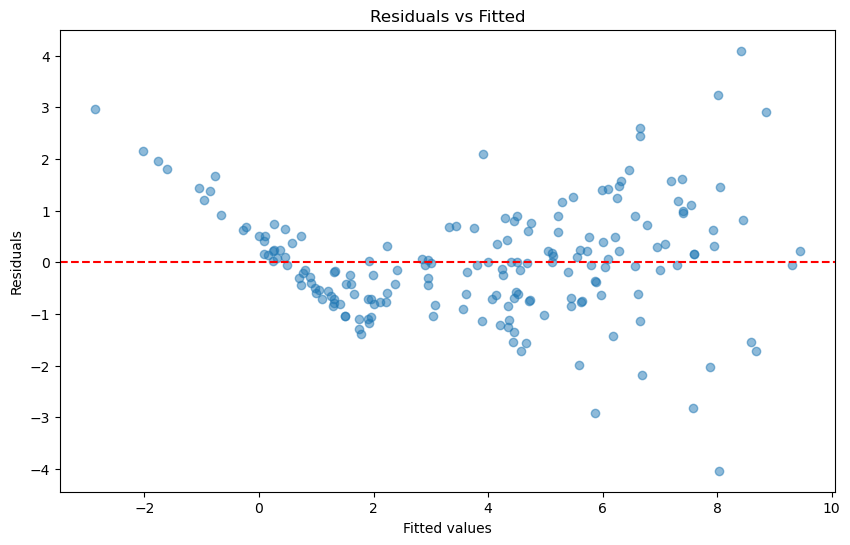

In [69]:
# 1. Residuals vs Fitted
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


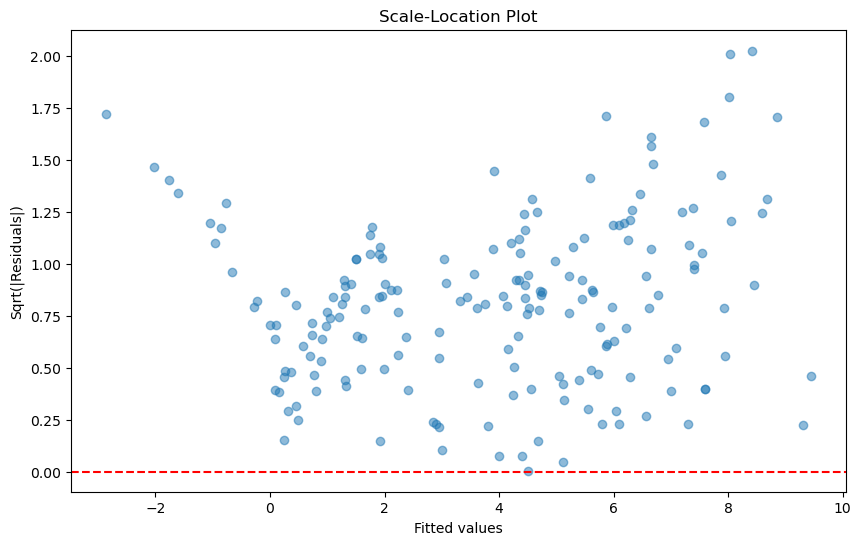

In [70]:
# 2. Scale-Location Plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, np.sqrt(np.abs(residuals)), alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location Plot')
plt.show()

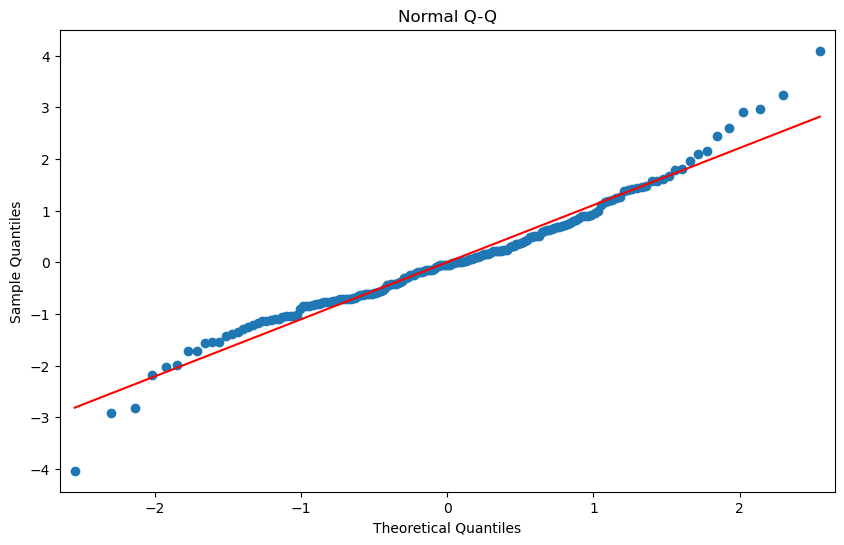

In [71]:
# 3. Normal Q-Q Plot
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title('Normal Q-Q')
plt.show()

In [72]:
yx=4/(len(y_train) - len(model.params))

In [73]:
len(y_train), len(model.params)

(184, 7)

In [74]:
yx

0.022598870056497175

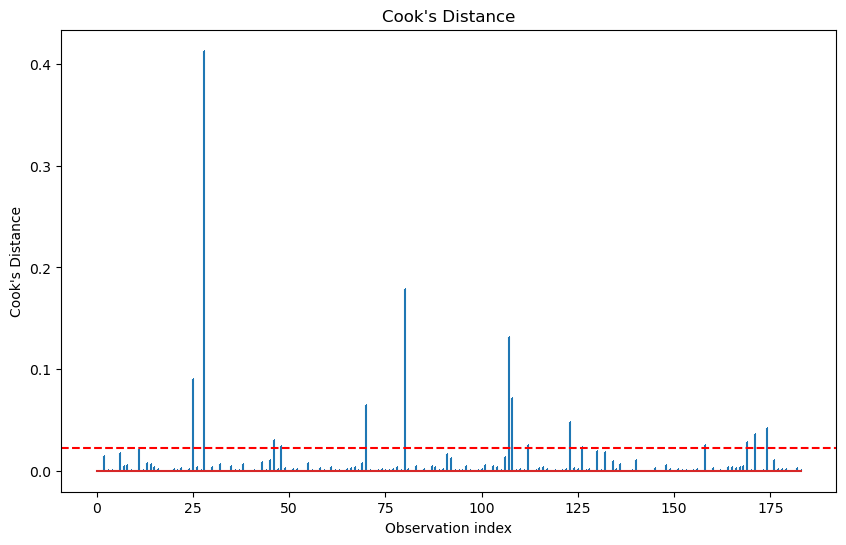

In [75]:
# 4. Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.axhline(y=4/(len(y_train) - len(model.params)), color='red', linestyle='--')
plt.xlabel('Observation index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance')
plt.show()

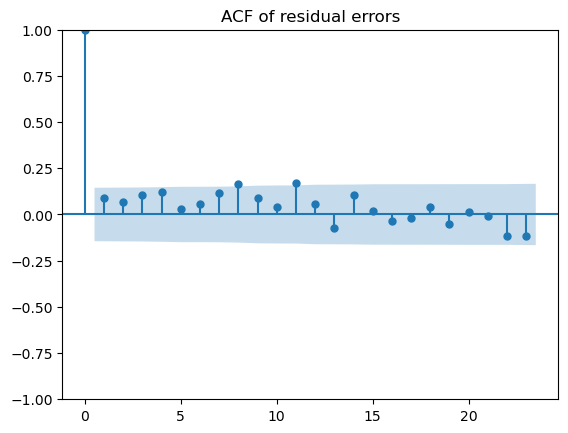

In [76]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(regressor_ini.resid, title='ACF of residual errors')
plt.show()

Condition Number Higher the value or we can say more that 30 means there is a multicolinearity. 
In our example, the value is very high. There is a multicolinearity in the dataset.

#### 9. Model Performance

In [77]:
class Model_Performance:
    def __init__(self,actual,predicted,count):
        self.actual = actual
        self.predicted = predicted
        self.count = count
        
    def mape(self):
        return (np.mean(np.abs((self.actual - self.predicted) / self.actual)))*(1/self.count)
    
    def mae(self):
        return (np.mean(np.abs((self.actual - self.predicted))))*(1/self.count)
    
    def mse(self):
        return (np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count)
    
    def rmse(self):
        return np.sqrt((np.mean(np.abs((self.actual - self.predicted))))**2*(1/self.count))

In [78]:
mp = Model_Performance(y_test,y_pred_ini,len(y_test))
regression_ini = {'MODEL NAME':['Regression_Ini'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [79]:
regression_ini

{'MODEL NAME': ['Regression_Ini'],
 'MAPE': [0.048177183058556276],
 'MAE': [0.04271507563732157],
 'MSE': [0.14596621493616818],
 'RMSE': [0.38205525115638467]}

In [80]:
mp = Model_Performance(y_test,y_pred_tuned,len(y_test))
regression_tuned = {'MODEL NAME':['Regression_Tuned'],'MAPE':[mp.mape()],'MAE':[mp.mae()],'MSE':[mp.mse()], 'RMSE':[mp.rmse()]}

In [81]:
regression_tuned

{'MODEL NAME': ['Regression_Tuned'],
 'MAPE': [0.005533885974775377],
 'MAE': [0.012466179722633504],
 'MSE': [0.0124324509501599],
 'RMSE': [0.11150090111815196]}

In [82]:
Final_Result = pd.concat([pd.DataFrame(regression_ini),pd.DataFrame(regression_tuned)])

In [83]:
Final_Result

,MODEL NAME,MAPE,MAE,MSE,RMSE
0,Regression_Ini,0.048177,0.042715,0.145966,0.382055
0,Regression_Tuned,0.005534,0.012466,0.012432,0.111501


Overall there is a good increase in the R2 and Adjusted R2 values in the tuned model and 
there is a decrease in the MAE, MSE and RMSE. 
This is behaviour is good.